# Adaptive linear neurons

Adaptive linear neurons (**Adaline** ) là một loại single-layer neural network (NN): được xuất bản bởi Bernard Widrow và Tedd Hoff chỉ một vài năm sau thuật toán perceptron.
Adapline định nghĩa các khái niệm chính và tối ưu hàm chi phí, đặt nền tảng cho các thuật toán machine learning tiên tiến hơn để phân loại sau này như logistic regression, support vector machines và regression models.
Sự khác biệt chính giữa **Adaline** và **perceptron** là các trọng số được cập nhật dựa trên **activation function** thay vì **unit step function** như trong perceptron. Trong Adaline, **activation function** này, $\phi(z)$ , chỉ đơn giản là định nghĩa hàm **net_input**, do đó: $$\phi(w^Tx)=w^Tx $$
Mặc dù **activation function** được sử dụng để học các trọng số, nhưng **Adaline** vẫn sử dụng hàm ngưỡng (**threshold function**) để đưa ra dự đoán cuối cùng, tương tự như **unit step function** ở **perceptron**.
![alt text](https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_vs_adaline.png)

## Tối ưu hàm chi phí (cost functions) bằng Gradient Descent (GD)
### 1. Hàm chi phí (cost functions)
Một trong những thành phần chính của việc học có giám sát (supervised learning) là định nghĩa hàm mục tiêu để tối ưu hóa trong quá trình học.
Ở trong **adaline**, ta định nghĩa hàm mục tiêu là hàm chi phí $J$ để học các trọng số là tổng bình phương lỗi <**sum of squared errors (SSE)**> giữa kết quả tính toán và nhãn thực tế.$$J(w)=\frac{1}{2}\sum\Big((y^{(i)}-\phi(z^{(i)})\Big)^2$$
$\frac{1}{2}$ được thêm vào để dễ dàng lấy được độ dốc của hàm chi phí hoặc tổn thất đối với các trọng số.
Ưu điểm của **activation function** này là nó liên tục, trái ngược so với **unit step function** điều này làm cho hàm chi phí nó khác biệt. Và đặc biệt hàm chi phí này lôi, vì thế ta sẽ sử dụng một phương pháp phổ biến để tối ưu đó chính là **Gradient Descent (GD)**
### 2. Gradient Descent (GD)
GD là phương pháp tìm giá trị nhỏ nhất (đôi khi là lớn nhất ) của hàm số.
Hướng tiếp cận của thuật toán này là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0.

Giả sử ta cần tìm giá trị nhỏ nhất cho hàm $ f(\theta)$. Đầu tiên ta đặt $\theta$ tại một điểm bất kỳ. Sau đó cập nhật $ \theta$  theo công thức:
$$\theta_{i+1}=\theta_i-\eta\nabla_\theta f(\theta_i)$$
- Ví dụ hàm số $f(x,y)=(x^2+y-7)^2+(x-y+1)^2$ sẽ có hai điểm cực tiểu tại $(2,3)$ và $(-3,-2)$, dưới đây là hình minh họa khi sử dụng gradient descent để tìm cực tiểu, tùy vào điểm khởi tạo mà ta sẽ tìm được các kết quả khác nhau sau mỗi epochs
![alt text](https://machinelearningcoban.com/assets/GD/img3_0.015.gif)

Quy tắc cần nhớ: **luôn luôn đi ngược hướng với đạo hàm.**

####   * Vì sao phải đi ngược hướng với đạo hàm ?
Ví dụ: ta cần tối ưu (tìm cực tiểu ) hàm chi phí $J(w)$ với $w$ là một vectơ. Đạo hàm của $J(w)$ theo vectơ $w$ sẽ được định nghĩa là: $\nabla_w J(w) = \begin{bmatrix} \frac{\partial f(w)}{\partial w_1} \\ \vdots \\ \frac{\partial f(w)}{\partial w_n} \end{bmatrix}$
- Ta cập nhật trọng số của $w$ lên thêm một khoảng $\eta x$ thì hàm chi phí mới ta đạt được là $J(w+\eta x)$ với $\eta$ là tốc độ học (tốc độ bước ).
- Điều ta cần chưng minh là: $J(w) > J(w+\eta x)$ hay $J(w+\eta x) - J(w)< 0$
- Ta áp dụng khai triển Taylor : $f(x)=f(a)+\frac{f'(a)}{1!}(x-a)+ \frac{f^{(2)}(a)}{2!}(x-a)^2 + \dots$ 
- Ta có:$$J(w+\eta x)=J(w)+\frac{\nabla J(w)}{1!}\big((w+\eta x)-w\big)+ \frac{\nabla^2 J(w)}{2!}\big((w+\eta x)-w\big)^2 + ... $$
$$ \iff J(w+\eta x)=J(w)+\eta x\nabla J(w)+ \frac{\eta^2}{2!}x\nabla^2 J(w) + ... \quad\quad\quad\quad\quad(1)$$
- Với $\eta$ nhỏ thì $\eta^2$ sẽ tiến về $0$ thì biểu thức $(1)$ sẽ xấp xỉ bằng:
$$ J(w+\eta x)\approx J(w)+\eta x\nabla J(w) \iff J(w+\eta x)-J(w)=\eta x\nabla J(w)$$
- Gọi $\alpha$ là góc tạo với $x$ và $\nabla J(w)$ ta có: $$\cos(\alpha)=\frac{x\nabla J(w)}{|x||\nabla J(w)|}$$
- Mặc khác ta có $$-1 \leq \cos(\alpha) \leq 1\iff -1 \leq \frac{x\nabla J(w)}{|x||\nabla J(w)|} \leq 1 \quad\quad\quad (2)$$
- Đặt $k=|x||\nabla J(w)| > 0$, thì từ $(2)$ ta sẽ có: $$-\eta k \leq \eta x\nabla J(w) \leq \eta k \iff -\eta k \leq J(w+\eta x)-J(w) \leq \eta k$$
- Điều ta muốn là hàm chi phí sẽ âm hoặc nhỏ nhất, từ biểu thức trên ta thấy $min\big(J(w+\eta x)-J(w)\big)=-\eta k$ khi $\cos(\alpha)=-1$,điều này có nghĩa là góc tạo bởi $x$ và $\nabla J(w)$ là $180^o$ tức là hướng của $x$ phải ngược với hướng của $\nabla J(w)$
### 3. Tối ưu hàm chi phí bằng GD
Ta có: $$J(w)=\frac{1}{2}\sum\Big((y^{(i)}-\phi(z^{(i)})\Big)^2$$
Áp dụng GD ta có biểu thức cập nhật của $w$ là : $w:=w+\nabla w$. 
Trong đó $\nabla w$ được định nghĩa là độ dốc âm nhân với tỷ lệ học tập, $\eta$: $$\nabla w = -\eta \nabla J(w)$$
Để tính toán, ta cần tính đạo hàm riêng của hàm chi phí theo từng trọng số, $w_j$:
$$\frac{\partial J}{\partial w_j} = -\sum_i \big(y^{(i)} - \phi (z^{(i)}) \big)x_j^{(i)}$$
Vì vậy có thể viết công thức cập nhật của $w_j$ là: $$\nabla w_j = -\eta\frac{\partial J}{\partial w_j}=  \eta\sum_i \big(y^{(i)} - \phi (z^{(i)}) \big)x_j^{(i)}$$
Vì cập nhật tất cả các trọng số nên công thức cập nhật sẽ là: $$ w:= w+\nabla w$$

## Implementing Adaline in Python


In [5]:
import numpy as np
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)        

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
Iris = load_iris()
data = pd.DataFrame(Iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
trans = pd.Categorical.from_codes(Iris.target, Iris.target_names)
target = pd.DataFrame(trans, columns = ['type'])
df = pd.concat([data, target], axis = 1)
df.head()

X = df.iloc[:100, [0,2]].values
y = df.iloc[:100, 4].values
y = np.where(y == 'setosa', -1, 1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


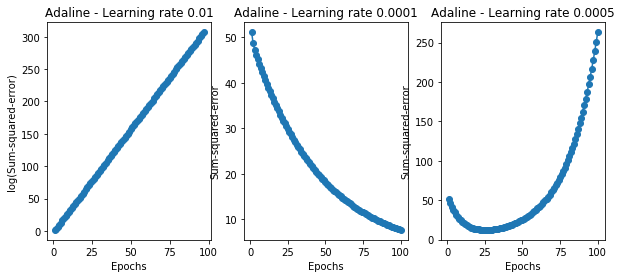

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
ada1 = AdalineGD(n_iter=100, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
ada3 = AdalineGD(n_iter=100, eta=0.0005).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1),ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0005')
plt.show()

## Improving gradient descent through feature scaling
**Gradient descent** là một trong nhiều thuật toán được hưởng lợi từ **feature scaling**.Ở phần này ta sẽ sử dụng một phương thức của **feature scaling** được gọi là tiêu chuẩn hóa (**standardization**)
Nó sẽ đưa dữ liệu của ta về dạng phân phối chuẩn với với phương sai đơn vị (có độ lệch chuẩn bằng 1) và có trung bình gần 0.Tuy nhiên nó không làm cho tập gốc thành phân phối chuẩn, tập gốc vẫn không đổi về phân phối dữ liệu, Nó dịch các điểm dữ liệu về dạng mà trung bình của nó ở vị trí 0 và có phương sai là 1.

Ví dụ, để chuẩn hóa tính năng thứ j, chúng ta chỉ cần trừ trung bình mẫu, $\mu_j$ từ mọi ví dụ đào tạo và chia nó cho độ lệch chuẩn của nó, $\sigma_j$: $$x_j^{'} = \frac{x_j-\mu_j}{\sigma_j}$$
Ở đây, $x_j$ là vectơ bao gồm các giá trị tính năng thứ j của tất cả ví dụ của dữ liệu đào tạo, _n_ , và kỹ thuật chuẩn hóa này được áp dụng cho từng tính năng, j, trong tập dữ liệu.
Một trong những lý do tại sao tiêu chuẩn hóa giúp học tập giảm dần là vì trình tối ưu hóa phải trải qua ít bước hơn để tìm ra giải pháp tốt hoặc tối ưu (tối thiểu chi phí), như được minh họa trong hình dưới đây, trong đó các cấu hình con biểu thị bề mặt chi phí như một hàm của hai trọng số mô hình trong bài toán phân loại hai chiều:
![alt text](https://i.stack.imgur.com/3VPHn.png)

In [5]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution =  0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.9, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

Sau khi tiêu chuẩn hóa, ta sẽ đào tạo lại Adaline và chúng tôi sẽ thấy rằng giờ đây nó sẽ hội tụ sau một số lượng nhỏ epochs sử dụng tỷ lệ học tập là $\eta$ = 0,01:

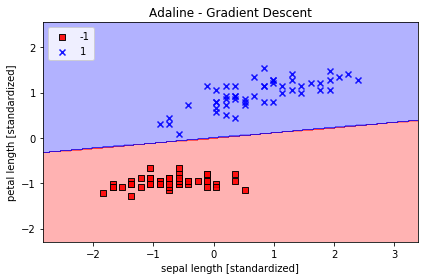

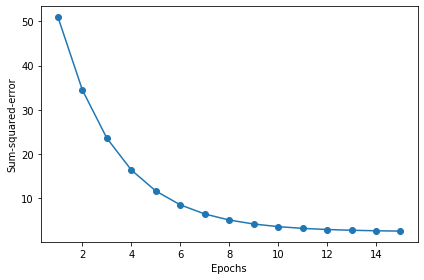

In [6]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1),ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

## Large-scale machine learning and stochastic gradient descent
Ở phân trước ta sử dụng phương pháp **Gradient Descent** hay còn gọi là **batch gradient descent** vì nó được tính toán dự trên toàn bộ tập dữ liệu. Điều này sẽ tốn kém khi ta làm việc với những bộ dữ liệu lớn, vì thế ta cần đánh giá lại toàn bộ tập dữ liệu đào tạo mỗi khi chúng ta thực hiện một bước về mức tối thiểu.
Một thay thế phổ biến cho thuật toán **batch gradient descent** là **stochastic gradient descent** (SGD), đôi khi còn được gọi là giảm dần độ dốc trực tuyến hoặc lặp lại (iterative or online gradient descent). Thay vì cập nhật các trọng số dựa trên tổng số lỗi tích lũy trên tất cả các ví dụ đào tạo, $x^{(i)}$: $$\Delta w = \eta \sum_i \big(y^{(i)}-\phi(z^{(i)})\big)x^{(i)}$$
Chúng ta cập nhật các trọng số tăng dần cho mỗi ví dụ đào tạo: $$\eta \big(y^{(i)}-\phi(z^{(i)})\big)x^{(i)}$$
Mặc dù SGD có thể được coi là GD, nhưng nó thường đạt tốc độ hội tụ nhanh hơn nhiều do cập nhật trọng lượng thường xuyên hơn. Vì mỗi đạo hàm được tính toán dựa trên một ví dụ duy nhất. 
Để có được kết quả thỏa mãn thông qua SGD, điều quan trọng là phải trình bày dữ liệu theo thứ tự ngẫu nhiên 
Ngoài ra, ta cần xáo trộn tập dữ liệu cho mỗi epochs để ngăn chặn chu kỳ.

Một ưu điểm khác của SGD là có thể sử dụng nó cho việc **online learning**. Trong **online learning**, mô hình của ta sẽ được đào tạo nhanh chóng khi có dữ liệu đào tạo mới.



















In [8]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10,
        shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,size=1 + m)
        self.w_initialized = True
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

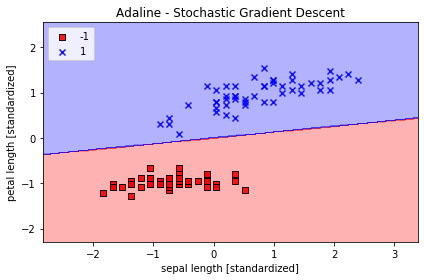

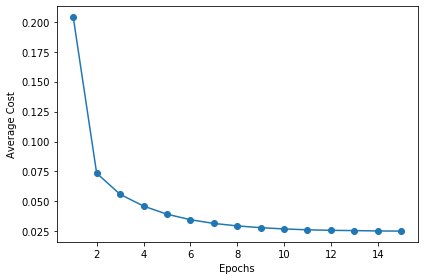

In [14]:
pada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
pada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=pada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(pada_sgd.cost_) + 1), pada_sgd.cost_,
marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()